In [1]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

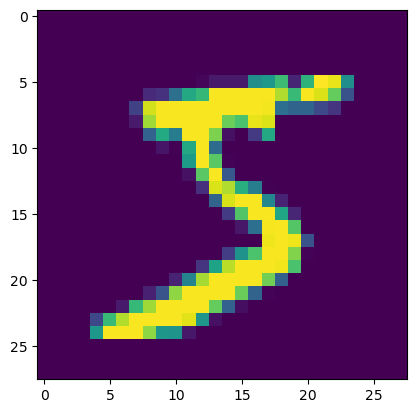

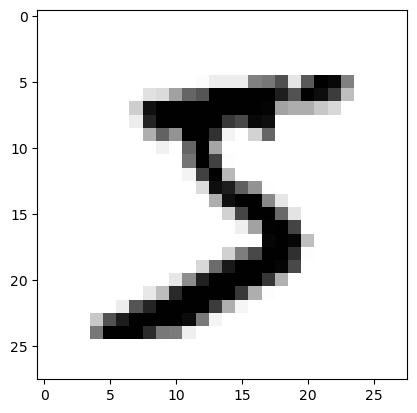

In [3]:
import matplotlib.pyplot as plt
x_train.shape
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap= plt.cm.binary)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

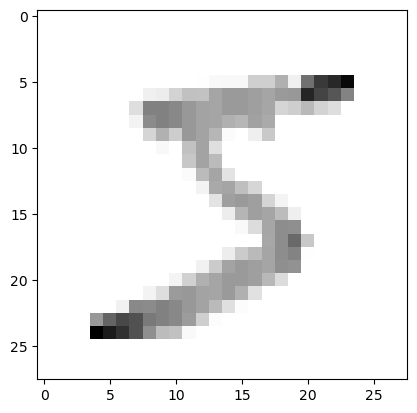

In [4]:
print(x_train[0])
#Normalisation
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [5]:
print(y_train[0])

5


In [6]:
import numpy as np
imgsize=28
x_train=np.array(x_train).reshape(-1, imgsize, imgsize, 1)
x_test=np.array(x_test).reshape(-1, imgsize, imgsize, 1)
print("Training Sample dimension:", x_train.shape)
print("Testing Sample dimension:", x_test.shape)

Training Sample dimension: (60000, 28, 28, 1)
Testing Sample dimension: (10000, 28, 28, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Input

model1 = Sequential()

# Define Input layer first
model1.add(Input(shape=x_train.shape[1:]))

# First Convolutional Layer (No input_shape here)
model1.add(Conv2D(64, (3,3)))  
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer
model1.add(Conv2D(64, (3,3)))  
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer
model1.add(Conv2D(64, (3,3)))  
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Fully Connected Layers
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation("relu"))

model1.add(Dense(32))
model1.add(Activation("relu"))

# Output Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print("Total Training Samples:", len(x_train))

Total Training Samples: 60000


In [10]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [11]:
model1.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.7839 - loss: 0.6767 - val_accuracy: 0.9603 - val_loss: 0.1345
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9655 - loss: 0.1109 - val_accuracy: 0.9739 - val_loss: 0.0821
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.9768 - loss: 0.0741 - val_accuracy: 0.9770 - val_loss: 0.0759
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9833 - loss: 0.0561 - val_accuracy: 0.9789 - val_loss: 0.0675
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0.9805 - val_loss: 0.0639


In [12]:
test_loss, test_acc=model1.evaluate(x_test, y_test)
print("Test Loss on 10k test samples:", test_loss)
print("Validation Accuracy on 10k test samples:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9780 - loss: 0.0789
Test Loss on 10k test samples: 0.061442140489816666
Validation Accuracy on 10k test samples: 0.982200026512146


In [13]:
predic=model1.predict([x_test])
print(predic)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 59s 192ms/step

C:\Users\namda\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


C:\Users\namda\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


[[1.0759473e-07 1.5570326e-07 6.5764914e-07 ... 9.9999714e-01
  4.1460635e-09 1.0429309e-06]
 [4.6381654e-04 4.9847330e-07 9.9924695e-01 ... 4.7146732e-05
  1.3147935e-04 1.5467975e-06]
 [8.6322677e-07 9.9999702e-01 9.4742873e-08 ... 1.8932066e-06
  1.3847297e-08 2.7569172e-08]
 ...
 [9.3576251e-11 1.2414439e-07 3.8483630e-10 ... 7.1080756e-08
  2.3567172e-06 4.3592413e-06]
 [3.4334844e-06 1.9496206e-08 1.3305270e-09 ... 1.5788748e-08
  1.2118246e-06 5.5183204e-06]
 [6.0598808e-04 3.7876244e-08 8.2835659e-06 ... 1.3086482e-08
  4.2736363e-05 2.7160607e-07]]


In [14]:
print(np.argmax(predic[0]))

7


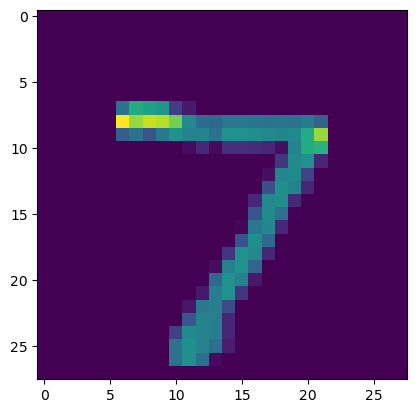

In [15]:
plt.imshow(x_test[0])

8


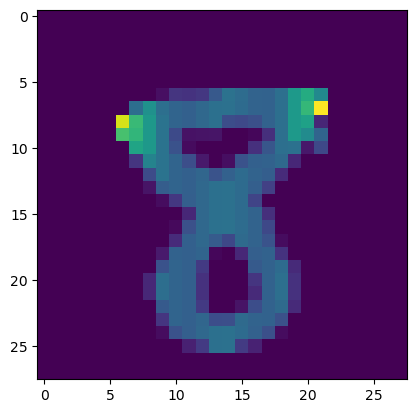

In [16]:
print(np.argmax(predic[128]))
plt.imshow(x_test[128])
      

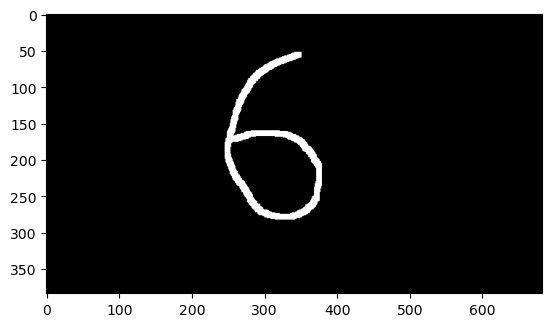

In [17]:
import cv2
img=cv2.imread('six.png')
plt.imshow(img)


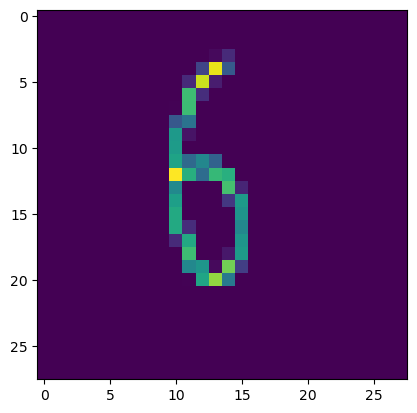

In [18]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
resized=cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
plt.imshow(resized)

In [19]:
newimg=tf.keras.utils.normalize(resized, axis=1)

In [20]:
newimg=np.array(newimg).reshape(-1,imgsize, imgsize, 1)

In [21]:
predict=model1.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [22]:
 print(np.argmax(predict))

6


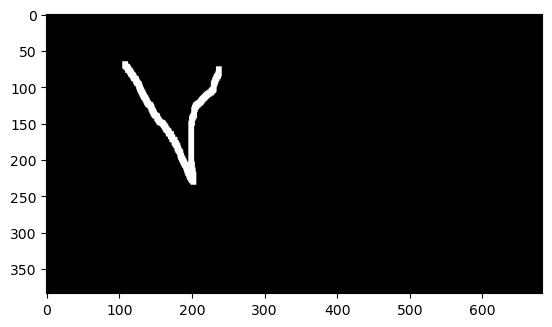

In [23]:
img=cv2.imread('test.png')
plt.imshow(img)

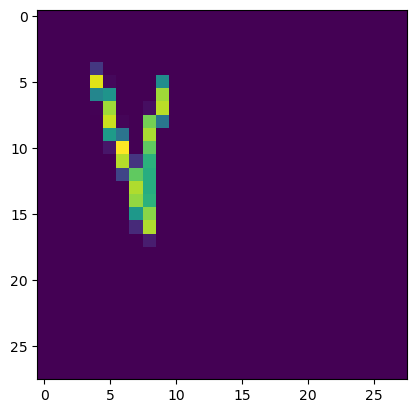

In [24]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
resized=cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
plt.imshow(resized)

In [25]:
newimg=tf.keras.utils.normalize(resized, axis=1)
newimg=np.array(newimg).reshape(-1,imgsize, imgsize, 1)


In [26]:
predict=model1.predict(newimg)
print(np.argmax(predict))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4


In [27]:
model1.save("mnist_model.h5")


In [28]:
import cv2

# Force release any previous webcam instance
cap = cv2.VideoCapture(0)
cap.release()
cv2.destroyAllWindows()
print("✅ Webcam released. Now try running your script.")


✅ Webcam released. Now try running your script.


In [ ]:
import cv2
import numpy as np
import time

try:
    model1  # Check if model1 exists
except NameError:
    print("❌ Error: `model1` is not defined. Run the training cell first.")
    raise SystemExit

# Open webcam
cap = cv2.VideoCapture(0)  # Change index if needed

if not cap.isOpened():
    print("❌ Webcam not detected! Trying another index...")
    cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("❌ No working webcam found. Exiting.")
    exit()

print("✅ Webcam is working! Warming up...")
time.sleep(2)  # Give webcam time to initialize

# **FORCE FRAME CAPTURE**
for _ in range(5):  
    ret, frame = cap.read()
    if ret:
        print("✅ Frame captured successfully!")
        break
    print("⚠️ Warning: Retrying to capture frame...")

if not ret:
    print("❌ ERROR: Couldn't capture frames after multiple attempts. Exiting.")
    cap.release()
    exit()

cv2.namedWindow("Digit Recognition", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Digit Recognition", 800, 600)

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ ERROR: Frame capture failed, retrying...")
        continue

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Invert colors
    gray = cv2.bitwise_not(gray)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:
            x, y, w, h = cv2.boundingRect(contour)

            # Draw bounding box
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Extract & preprocess the digit
            digit = gray[y:y+h, x:x+w]
            digit = cv2.resize(digit, (28, 28))
            digit = digit / 255.0
            digit = digit.reshape(1, 28, 28, 1)

            # Predict the digit
            prediction = model1.predict(digit)
            digit_class = np.argmax(prediction)

            # Display prediction
            cv2.putText(frame, f"Number: {digit_class}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the webcam feed
    cv2.imshow("Digit Recognition", frame)

    # Press 'q' to exit manually
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print("✅ Program exited manually.")


✅ Webcam is working! Warming up...
✅ Frame captured successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
model1.save("mnist_cnn.h5")  # Saves model in .h5 format
import os
print(os.listdir())  # Lists all files in the current directory
model1.save("Downloads/mnist_cnn.h5")  # Replace with your folder path
print(hello)